In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [2]:
species.head(10)

category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
5                                  White-Tailed Deer                 NaN  
6                                Feral Hog, Wild Pig                 NaN  
7                                             Coyote  Species of Concern  
8                                          Gray Wolf          Endangered  
9                                           Red Wolf          Endangered

In [3]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [4]:
species.describe()

category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161

In [5]:
print(f'species shape: {species.shape}')
print(f'observations shape: {observations.shape}')

species shape: (5824, 4)
observations shape: (23296, 3)


In [6]:
unique_species = species['scientific_name'].nunique()
print(f'There are {unique_species} unique species in parks.')

There are 5541 unique species in parks.


In [7]:
categories_of_species = species.groupby('category').size()
categories_of_species

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Some components that you may want to include:

    What is the distribution of conservation_status for animals?
    Are certain types of species more likely to be endangered?
    Are the differences between species and their conservation status significant?
    Which species were spotted the most at each park?


What is the distribution of conservation_status for animals?

Text(0, 0.5, 'Frequency')

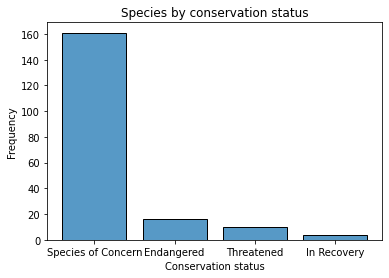

In [8]:
sns.histplot(species['conservation_status'], shrink=0.8)
plt.title('Species by conservation status')
plt.xlabel('Conservation status')
plt.ylabel('Frequency')

In [9]:
pivot_df = pd.crosstab(species['category'], species['conservation_status'])

In [10]:
pivot_df

conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                     1            0                   4           2
Bird                          4            3                  72           0
Fish                          3            0                   4           4
Mammal                        7            1                  28           2
Nonvascular Plant             0            0                   5           0
Reptile                       0            0                   5           0
Vascular Plant                1            0                  43           2

Are certain types of species more likely to be endangered

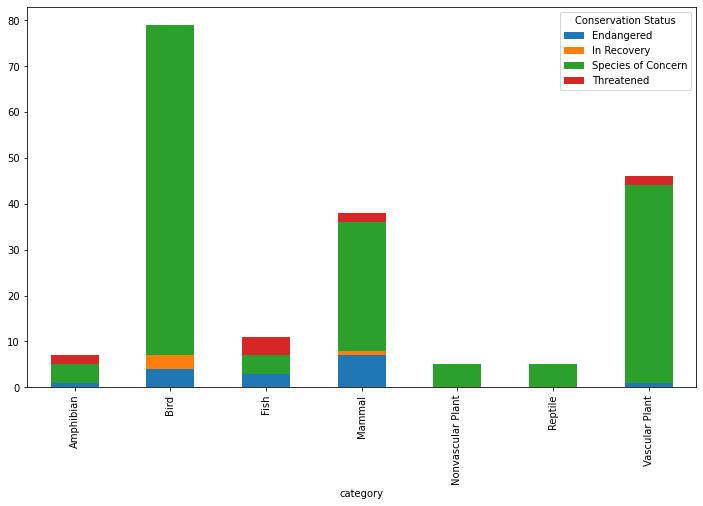

In [11]:
pivot_df.plot(kind='bar', stacked=True, figsize=(12,7))
plt.legend(title='Conservation Status')

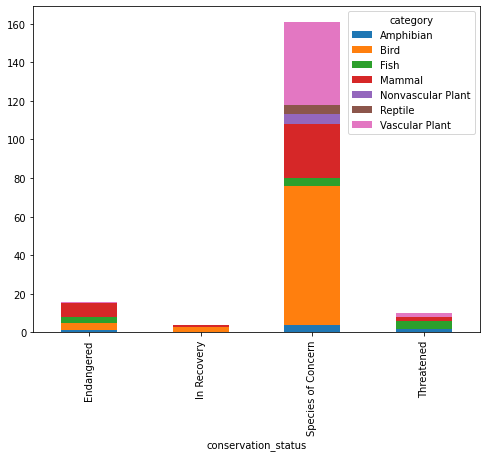

In [25]:
conservationCategory = species.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()

ax = conservationCategory.plot(kind='bar', figsize=(8,6), stacked=True)

Fish and Amphibians

In [ ]:
category_counts['percent_protected'] = 

In [12]:
observations.head(10)

scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7            39  
8           168  
9           250

In [13]:
parks = observations['park_name'].unique()
print(f'Parks: {parks}')

Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [14]:
# for park in parks:
#     observations['park_name'] == park

In [15]:
# Let's use a single DataFrame for clarity
df = observations.copy()

# Ensure you haven't dropped or filtered rows at this point

# Now, find the indices
idx = df.groupby('park_name')['observations'].idxmax()

# Access the rows using the indices
result = df.loc[idx]

In [16]:
result

scientific_name                            park_name  \
13138             Valerianella radiata                  Bryce National Park   
8840          Sonchus asper ssp. asper  Great Smoky Mountains National Park   
11281           Lycopodium tristachyum            Yellowstone National Park   
6682   Ivesia shockleyi var. shockleyi               Yosemite National Park   

       observations  
13138           176  
8840            147  
11281           321  
6682            223

In [26]:
species.fillna('No data', inplace=True)

In [28]:
species['is_protected'] = species['conservation_status'] != 'No data'

In [57]:
protected_by_categories = species.groupby(['category', 'is_protected'])['scientific_name']\
.nunique().reset_index()\
.pivot(columns='is_protected', index='category', values='scientific_name')\
.reset_index()

protected_by_categories.columns = ['category', 'not_protected', 'protected']

In [58]:
protected_by_categories

category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5
5            Reptile             73          5
6     Vascular Plant           4216         46

In [59]:
protected_by_categories['percent'] = protected_by_categories['protected'] / protected_by_categories['protected'] + protected_by_categories['not_protected']

In [60]:
protected_by_categories

category  not_protected  protected  percent
0          Amphibian             72          7     73.0
1               Bird            413         75    414.0
2               Fish            115         11    116.0
3             Mammal            146         30    147.0
4  Nonvascular Plant            328          5    329.0
5            Reptile             73          5     74.0
6     Vascular Plant           4216         46   4217.0